## **Data Exploration**

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df=pd.read_csv('./Data/Data.csv')

# 1. Kiểm tra thông tin dữ liệu

1. Kiểm tra kích thước, thông tin của dữ liệu

In [39]:
df.shape  # Kích thước dữ liệu

(1282, 10)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1282 entries, 0 to 1281
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tên sản phẩm              1282 non-null   object 
 1   Tên cửa hàng              1282 non-null   object 
 2   Giá                       1282 non-null   float64
 3   Thương hiệu               1282 non-null   object 
 4   Lượt đánh giá             1282 non-null   float64
 5   Điểm đánh giá trung bình  1282 non-null   float64
 6   Số lượng đã bán           1282 non-null   float64
 7   Category                  1282 non-null   object 
 8   Currency                  1282 non-null   object 
 9   Fit                       1282 non-null   float64
dtypes: float64(5), object(5)
memory usage: 100.3+ KB


In [41]:
df.isnull().sum()

Tên sản phẩm                0
Tên cửa hàng                0
Giá                         0
Thương hiệu                 0
Lượt đánh giá               0
Điểm đánh giá trung bình    0
Số lượng đã bán             0
Category                    0
Currency                    0
Fit                         0
dtype: int64

In [42]:
df.describe()

,Giá,Lượt đánh giá,Điểm đánh giá trung bình,Số lượng đã bán,Fit
count,1.282000e+03,1282.000000,1282.000000,1282.000000,1282.000000
mean,4.724506e+05,81.810452,4.702317,13.277691,1.871412
std,4.335192e+05,302.662204,0.562532,56.919003,1.519295
min,9.000000e+03,1.000000,1.000000,0.000000,0.000000
25%,1.710000e+05,3.000000,4.700000,0.000000,0.000000
50%,3.910000e+05,11.000000,4.880000,0.000000,3.000000
75%,5.880000e+05,43.000000,5.000000,3.000000,3.080000
max,3.960000e+06,5194.000000,5.000000,886.000000,5.000000


2. Vẽ biểu đồ boxplot và histogram của các numeric features

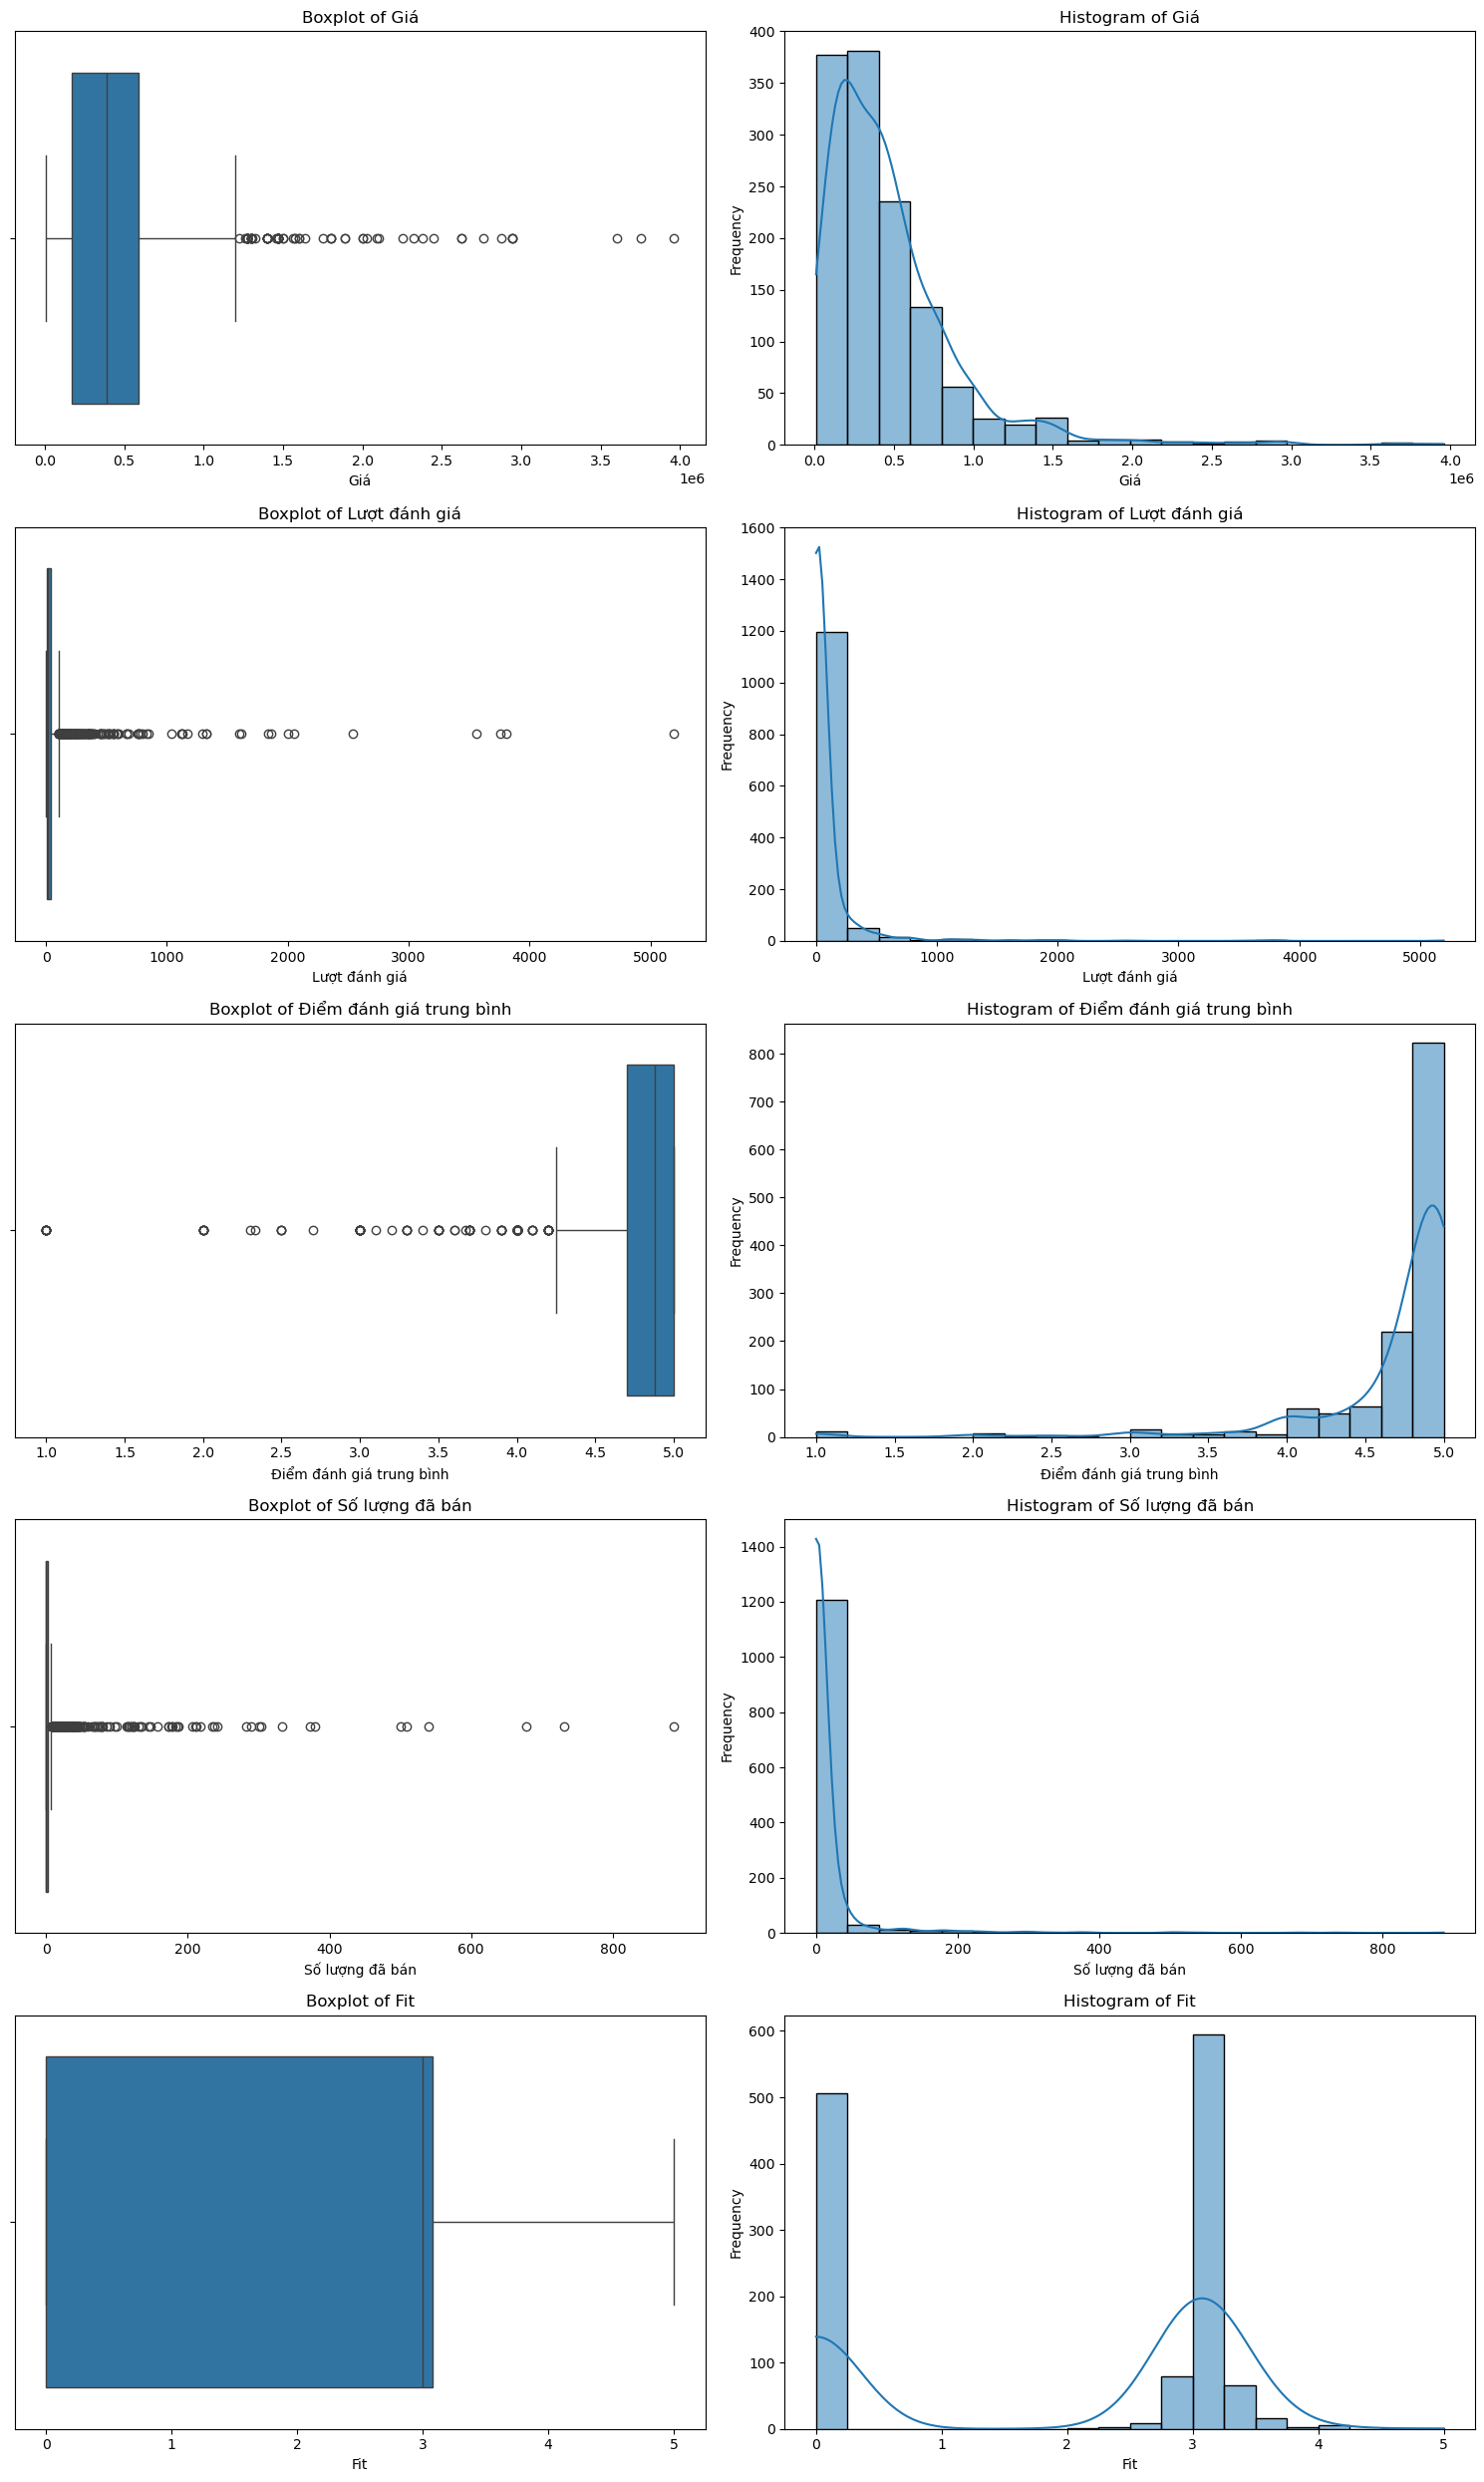

In [43]:
filtered_df = df[(df['Lượt đánh giá'] > 0) & (df['Điểm đánh giá trung bình'] > 0)]

# Danh sách các cột cần vẽ
columns_to_plot_filtered = ['Giá', 'Lượt đánh giá', 'Điểm đánh giá trung bình', 'Số lượng đã bán', 'Fit']

# Tạo các biểu đồ cho dữ liệu đã lọc
plt.figure(figsize=(15, 25))
for i, col in enumerate(columns_to_plot_filtered, 1):
    # Boxplot
    plt.subplot(len(columns_to_plot_filtered), 2, 2 * i - 1)
    sns.boxplot(x=filtered_df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    # Histogram
    plt.subplot(len(columns_to_plot_filtered), 2, 2 * i)
    sns.histplot(filtered_df[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Conclusion:
1. Feature 'Giá':
-  The presence of numerous outliers and the asymmetrical distribution suggest a right-skewed dataset.  
-  Most of the data is concentrated in the range 0–500.000 VNĐ.  
2. Feature 'Lượt đánh giá': 
-  Many products have very low review counts
-  There are extreme outliers, with some products having over 5000 reviews.
-  The distribution is right-skewed, with most products having fewer than 100 reviews.  
3. Feature 'Điểm đánh giá trung bình': 
-  Most products have an average rating close to the maximum (4.5 - 5).
-  A small number of products have ratings below 3.
4. Feature 'Số lượng đã bán': 
-  Most products have low sales numbers (below 100).
-  The distribution is right-skewed, with most products having very low sales, and a few products selling exceptionally well.
5. Feature 'Fit':
-  The Fit feature has a wide distribution, with most values ranging between 0 and 3.
-  The distribution is diverse, with semi-peak at low values (near 0) and mid-range values (around 2-3).

3. Heatmap của các feature

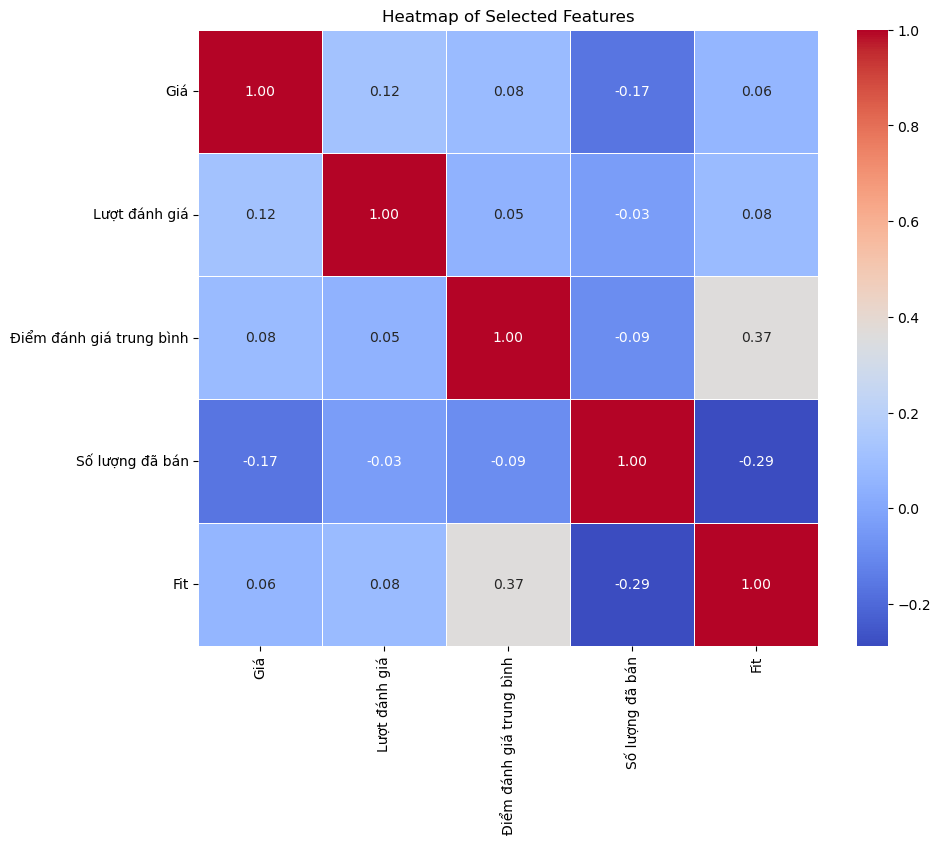

In [44]:
heatmap_columns = ['Giá', 'Lượt đánh giá', 'Điểm đánh giá trung bình', 'Số lượng đã bán', 'Fit']
heatmap_data = filtered_df[heatmap_columns].corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Selected Features')
plt.show()

# Conclusion: 
1. Most feature pairs exhibit weak correlations (values near 0). This suggests that there are no strong linear relationships between the features.  
2. The moderate correlation between **'Fit'** and **'Điểm đánh giá trung bình'** *0.37* suggests that users rate products more positively when they meet their expectations.  
3. The weak negative correlation between **'Giá'** and **'Số lượng đã bán'** *-0.17* supports the idea that cheaper products may sell more.
4. A correlation of *-0.29* between **'Số lượng đã bán'** with **'Fit'** indicates a slightly stronger negative relationship, where products with higher **"Fit"** scores tend to sell in smaller quantities.